   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

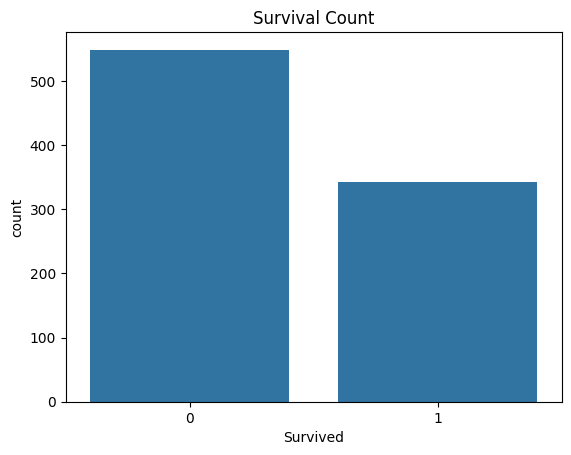

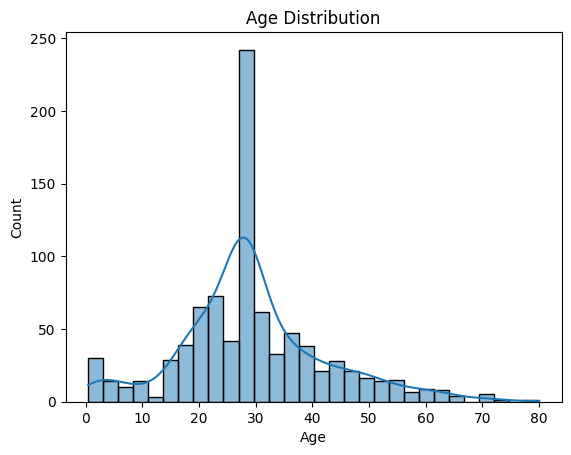

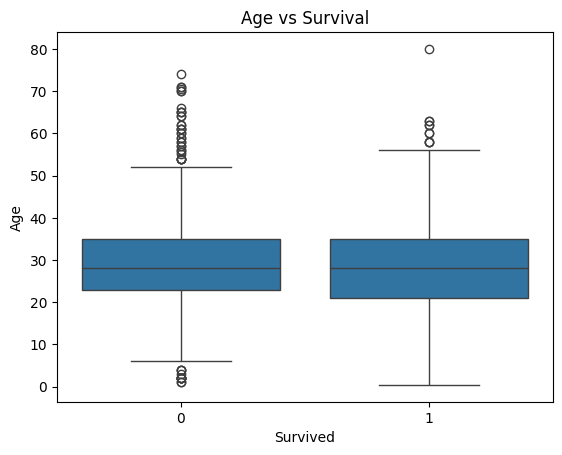

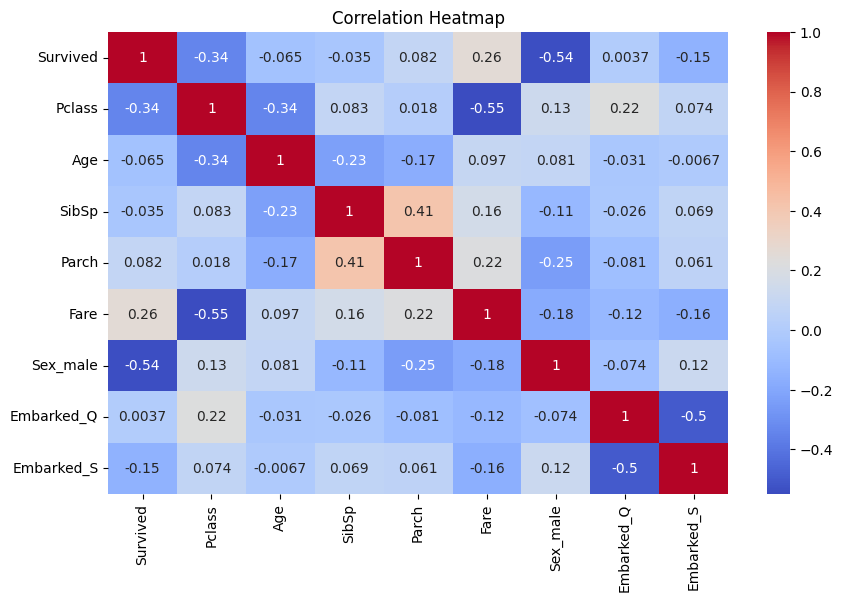

Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1 Score: 0.7638888888888888
ROC-AUC: 0.8826254826254826


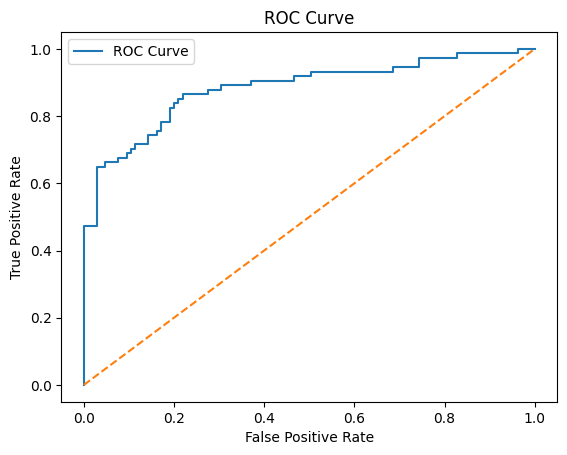

      Feature  Coefficient
4        Fare     0.002591
1         Age    -0.030537
3       Parch    -0.108108
6  Embarked_Q    -0.113105
2       SibSp    -0.295244
7  Embarked_S    -0.398065
0      Pclass    -0.936817
5    Sex_male    -2.591503
Model saved as logistic_model.pkl


In [29]:
# ===============================
# 1. IMPORT LIBRARIES
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve
)

import pickle


# ===============================
# 2. LOAD DATA
# ===============================
train = pd.read_csv("Titanic_train.csv")
test = pd.read_csv("Titanic_test.csv")

print(train.head())
print(train.info())


# ===============================
# 3. DATA PREPROCESSING
# ===============================

# Handle missing values
train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)

train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
test['Embarked'].fillna(test['Embarked'].mode()[0], inplace=True)

# Drop Cabin
train.drop(columns=['Cabin'], inplace=True)
test.drop(columns=['Cabin'], inplace=True)

# Drop 'Name' and 'Ticket' for correlation calculation as they are not numeric
train.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)
test.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

# Encode categorical variables
train = pd.get_dummies(train, columns=['Sex', 'Embarked'], drop_first=True)
test = pd.get_dummies(test, columns=['Sex', 'Embarked'], drop_first=True)


# ===============================
# 4. EXPLORATORY DATA ANALYSIS
# ===============================

# Survival count
sns.countplot(x='Survived', data=train)
plt.title("Survival Count")
plt.show()

# Age distribution
sns.histplot(train['Age'], kde=True)
plt.title("Age Distribution")
plt.show()

# Age vs Survival
sns.boxplot(x='Survived', y='Age', data=train)
plt.title("Age vs Survival")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


# ===============================
# 5. FEATURE SELECTION
# ===============================
X = train.drop(['Survived'], axis=1)
y = train['Survived']


# ===============================
# 6. TRAIN-TEST SPLIT
# ===============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# ===============================
# 7. LOGISTIC REGRESSION MODEL
# ===============================
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


# ===============================
# 8. MODEL EVALUATION
# ===============================
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


# ===============================
# 9. ROC CURVE
# ===============================
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


# ===============================
# 10. COEFFICIENT INTERPRETATION
# ===============================
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
})

print(coeff_df.sort_values(by="Coefficient", ascending=False))


# ===============================
# 11. SAVE MODEL
# ===============================
with open("logistic_model.pkl", "wb") as file:
    pickle.dump(model, file)

print("Model saved as logistic_model.pkl")

**1. What is the difference between precision and recall?**

- Precision = TP / (TP + FP). It measures how many of the positive predictions are actually positive. High precision means when the model predicts "positive", it's usually correct.

- Recall (Sensitivity) = TP / (TP + FN). It measures how many of the actual positive cases the model correctly identified. High recall means the model finds most of the positive cases. Tradeoff: increasing recall often lowers precision and vice versa. Choose based on whether false positives or false negatives are more costly

**2. What is cross-validation, and why is it important in binary classification?**

Cross-validation is a method to estimate the generalization performance of a model by splitting the dataset into multiple train/test folds (e.g., k-fold CV) and averaging performance across folds.
Its important because it gives a more robust estimate of model performance than a sigle train/test split ,helps detect overfitting, and can be used to tune hyperparameters reliably.